# Removal of movement artifacts from time series


In [1]:
import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display
import mplcursors
#import mpld3
from cycler import cycler

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy import stats

import seaborn as sns
import pingouin as pg
import itertools
from itertools import combinations
from statannotations.Annotator import Annotator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report

# import openpyxl
# from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 
from mne.stats import permutation_cluster_test


# TODO: add README file: 
# pip install pingouin
# pip install statannotations
# pip install fooof
# pip install mpldatacursor

In [2]:
#######################     USE THIS DIRECTORY FOR IMPORTING PYPERCEIVE REPO  #######################

# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
BetaSenSightLongterm_path = os.getcwd()
while BetaSenSightLongterm_path[-16:] != 'ResearchProjects':
    BetaSenSightLongterm_path = os.path.dirname(BetaSenSightLongterm_path)

# directory to PyPerceive code folder
PyPerceive_path = os.path.join(BetaSenSightLongterm_path,'PyPerceive_project', 'code', 'PyPerceive', 'code')
sys.path.append(PyPerceive_path)

# # change directory to PyPerceive code path within BetaSenSightLongterm Repo
os.chdir(PyPerceive_path)
os.getcwd()

'/Users/jenniferbehnke/Dropbox/work/ResearchProjects/PyPerceive_project/code/PyPerceive/code'

In [3]:
from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)

<module 'PerceiveImport.methods.metadata_helpers' from '/Users/jenniferbehnke/Dropbox/work/ResearchProjects/PyPerceive_project/code/PyPerceive/code/PerceiveImport/methods/metadata_helpers.py'>

In [4]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-16:] != 'ResearchProjects':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'BetaSenSightLongterm','code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

import meet as meet
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-16:] != 'ResearchProjects':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'BetaSenSightLongterm','code', 'BetaSenSightLongterm')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

'/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm'

In [6]:
# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd
import src.bssu.tfr.TimeFrequency as TF

importlib.reload(BSSuPsd)
importlib.reload(FFpsd)
importlib.reload(TF)


<module 'src.bssu.tfr.TimeFrequency' from '/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/tfr/TimeFrequency.py'>

In [5]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

## Plot raw time series from each subject hemisphere, session and channel group in M0S0

In [49]:
load_movement_artifact_table = loadResults.load_preprocessing_files(
    signal_filter="band-pass", table="movement_artifact_coord"
)

In [50]:
table = load_movement_artifact_table
table

,subject,hemisphere,session,channel_group,condition,number_move_artifacts,artifact_x,artifact_y,subject_hemisphere
024_Right_fu3m_ring_m0s0,024,Right,fu3m,ring,m0s0,0,0,0,024_Right
024_Right_fu3m_segm_intra_m0s0,024,Right,fu3m,segm_intra,m0s0,1.0,"[4664.043140765688, 4789.416189828562]","[-1.0195879785591728, -0.7867351600173578]",024_Right
024_Right_fu3m_segm_inter_m0s0,024,Right,fu3m,segm_inter,m0s0,1.0,"[500.3695080912744, 631.5713249732619]","[0.047129538429942386, 0.1542298539607998]",024_Right
024_Left_fu3m_ring_m0s0,024,Left,fu3m,ring,m0s0,0,0,0,024_Left
024_Left_fu3m_segm_intra_m0s0,024,Left,fu3m,segm_intra,m0s0,0,0,0,024_Left
024_Left_fu3m_segm_inter_m0s0,024,Left,fu3m,segm_inter,m0s0,0,0,0,024_Left


In [66]:
clean_power_spectra_table = loadResults.load_preprocessing_files(
    table="cleaned_power_spectra"
)

clean_power_spectra_table

,subject_hemisphere,session,channel_group,channel,frequencies,time_sectors,clean_psd_band_pass,sem_psd_band_pass,clean_psd_unfiltered,sem_psd_unfiltered,duration_clean_time_series,number_movement_artifacts_removed
024_Right_fu3m_RingR_LFP_R_03_STN_MT,024_Right,fu3m,ring,03,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.0038860277, 0.0017731322, 2.94538e-05, 0.00...","[0.0008011953, 0.0003619017, 4.2343e-06, 0.000...","[0.2597960751, 1.1418835138, 1.3362120222, 0.8...","[0.0705828307, 0.225037557, 0.3738328294, 0.19...",5288,0.0
024_Right_fu3m_RingR_LFP_R_13_STN_MT,024_Right,fu3m,ring,13,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.0007821413, 0.0003453286, 1.18196e-05, 0.00...","[0.0001967795, 8.56013e-05, 2.4417e-06, 0.0001...","[0.2496948185, 0.9145649559, 0.9307278218, 0.7...","[0.0590053677, 0.1178745733, 0.1971506207, 0.1...",5288,0.0
024_Right_fu3m_RingR_LFP_R_02_STN_MT,024_Right,fu3m,ring,02,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.0038082406, 0.0017033426, 2.61332e-05, 0.00...","[0.0007637516, 0.0003368961, 5.1083e-06, 0.000...","[0.3906090654, 1.5612823141, 1.2939337864, 1.1...","[0.1072112414, 0.2002373367, 0.2187213026, 0.1...",5288,0.0
024_Right_fu3m_RingR_LFP_R_12_STN_MT,024_Right,fu3m,ring,12,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.0013866593, 0.0006029603, 1.56912e-05, 0.00...","[0.0004186744, 0.000179706, 3.743e-06, 0.00022...","[0.2620220629, 1.3047344723, 1.0046221959, 0.6...","[0.0958008686, 0.2580785414, 0.2395470268, 0.1...",5288,0.0
024_Right_fu3m_RingR_LFP_R_01_STN_MT,024_Right,fu3m,ring,01,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.0037535081, 0.0016987003, 2.35881e-05, 0.00...","[0.0008783686, 0.0003954719, 4.1973e-06, 0.000...","[0.160304432, 0.8318632632, 1.0415789816, 0.71...","[0.0438164419, 0.2569778757, 0.3532539913, 0.1...",5288,0.0
024_Right_fu3m_RingR_LFP_R_23_STN_MT,024_Right,fu3m,ring,23,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.0010075196, 0.0004204561, 2.41573e-05, 0.00...","[0.0003594623, 0.0001527359, 5.509e-06, 0.0002...","[0.4821311061, 1.8140487078, 1.2614161381, 0.8...","[0.1527171293, 0.3746521069, 0.2159153868, 0.1...",5288,0.0
024_Right_fu3m_SegmIntraR_LFP_R_1A1B_STN_MT,024_Right,fu3m,segm_intra,1A1B,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.000696595, 0.0003349716, 4.93309e-05, 0.000...","[0.0001903427, 0.0001023829, 3.73583e-05, 0.00...","[0.2255874484, 0.7349484859, 0.5884198065, 0.2...","[0.0994113508, 0.2496598324, 0.2404771106, 0.0...",5162,1.0
024_Right_fu3m_SegmIntraR_LFP_R_1B1C_STN_MT,024_Right,fu3m,segm_intra,1B1C,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.0006534854, 0.0003341342, 6.52123e-05, 0.00...","[0.0002554076, 0.0001526215, 5.51017e-05, 0.00...","[0.164777311, 0.6868126921, 0.6573607184, 0.24...","[0.0687145558, 0.2845634091, 0.3322432453, 0.0...",5162,1.0
024_Right_fu3m_SegmIntraR_LFP_R_1A1C_STN_MT,024_Right,fu3m,segm_intra,1A1C,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.0006422846, 0.0005874465, 0.0004109664, 0.0...","[0.0002310201, 0.0002925703, 0.0003896029, 0.0...","[0.1419016565, 0.7050521612, 0.6079413238, 0.2...","[0.0448901485, 0.1871623743, 0.1161264466, 0.0...",5162,1.0
024_Right_fu3m_SegmIntraR_LFP_R_2A2B_STN_MT,024_Right,fu3m,segm_intra,2A2B,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, ...","[0.0036148393, 0.0055285634, 0.0065663738, 0.0...","[0.0009449001, 0.0039910096, 0.0063452577, 0.0...","[0.403082763, 2.0782604346, 

TypeError: 'Axes' object is not subscriptable

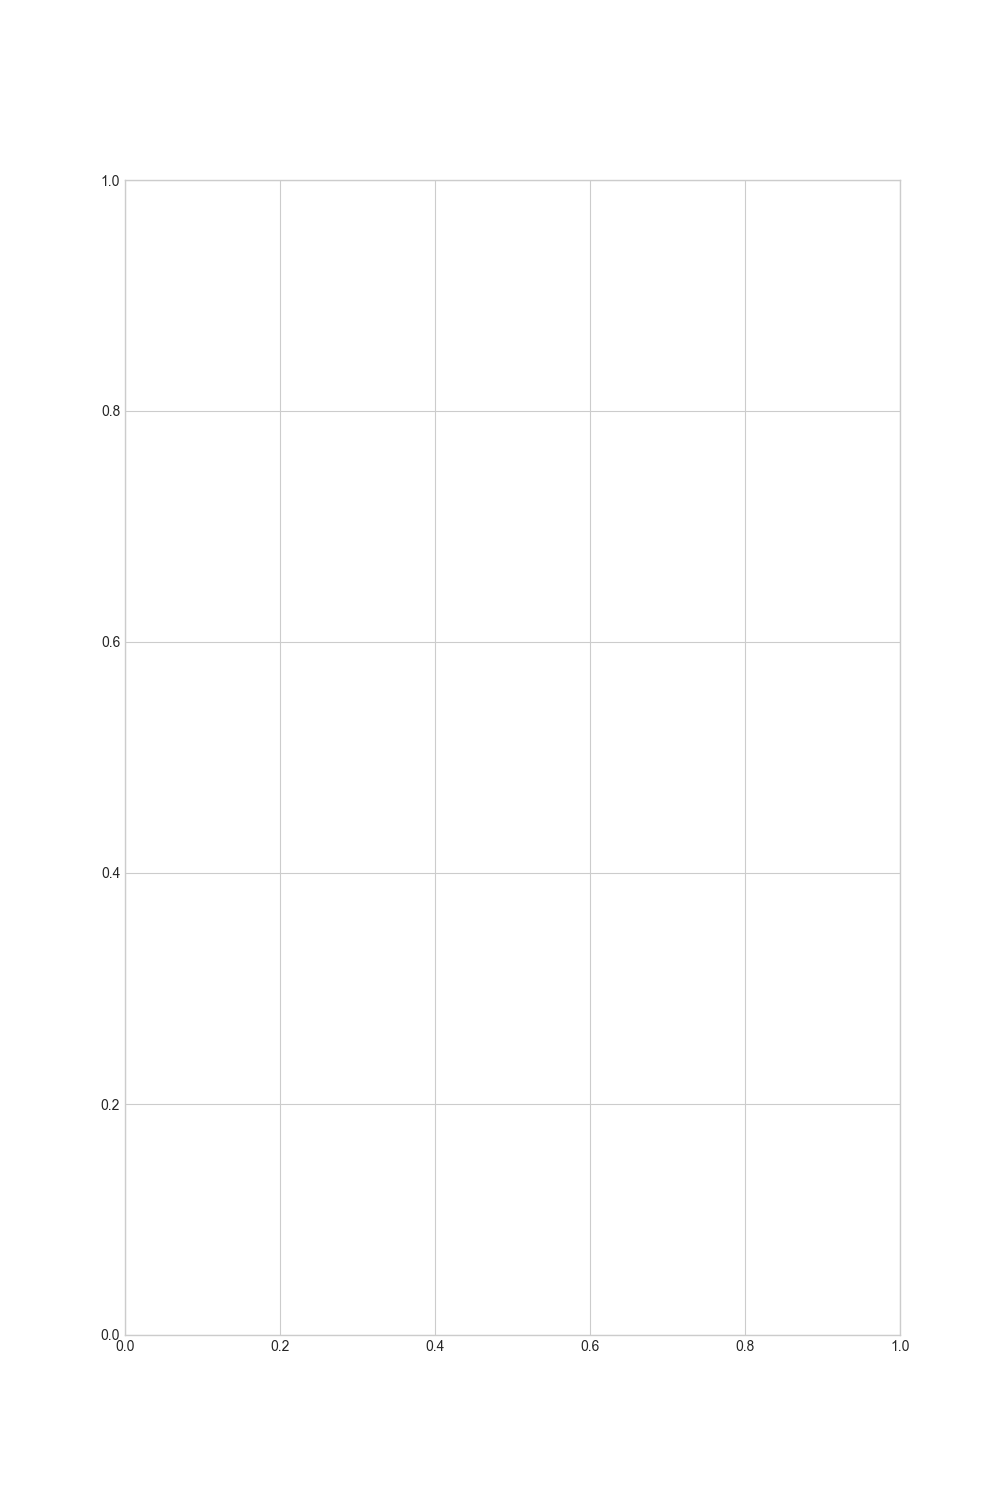

In [68]:
move_artifacts.plot_clean_power_spectra(signal_filter="band-pass")

In [18]:
hemisphere = "Right"

# depending on hemisphere: define incl_contact
incl_contact = {}
if hemisphere == "Right":
    incl_contact["Right"] = ["RingR", "SegmIntraR", "SegmInterR"]

elif hemisphere == "Left":
    incl_contact["Left"] = ["RingL", "SegmIntraL", "SegmInterL"]

mainclass_sub = main_class.PerceiveData(
        sub = "017", 
        incl_modalities= ["survey"],
        incl_session = ["fu3m"],
        incl_condition = ["m0s0"],
        incl_task = ["rest"],
        incl_contact=incl_contact[f"{hemisphere}"]
        )



	### WARNING: NaNs in Metadata Table sub-017 ###
NaNs in: sub-017_ses-2021040709594199_run-CHRONIC20210404124649.mat
NaNs in: sub-017_ses-2021040809491499_run-CHRONIC20210407065701.mat
NaNs in: sub-017_ses-2021041212054199_run-CHRONIC20210408063010.mat
NaNs in: sub-017_ses-2021041410364999_run-CHRONIC20210412103008.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414104500.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414104900.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105100.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105600.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105900.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110100.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110400.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110700.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110800.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414111200.mat
NaNs in: sub-017_ses-2021041410364999_run-IS2021

In [19]:
for cont, contact in enumerate(incl_contact[f"{hemisphere}"]): 

    time_series = getattr(mainclass_sub.survey, "fu3m")

    #time_series = getattr(mainclass_sub, "m0s0")
    #time_series = getattr(mainclass_sub.rest, contact)
    #time_series = time_series.run1.data

In [20]:
data = time_series.m0s0.rest.RingR.run1.data

In [21]:
channel_1=data.get_data()[0, :]

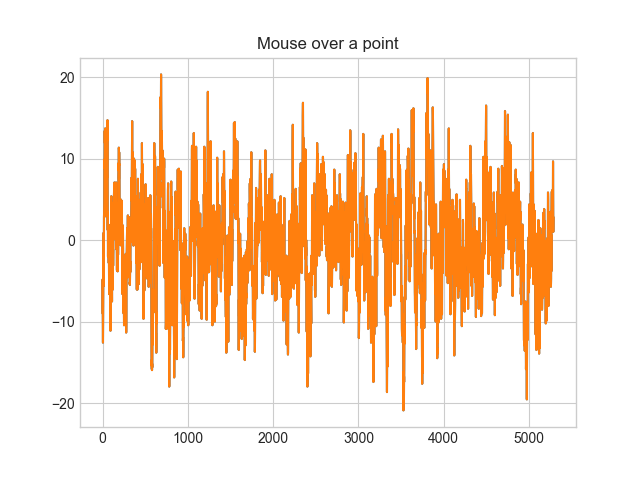

In [22]:
fig, ax = plt.subplots()
lines = ax.plot(channel_1)
ax.set_title("Mouse over a point")

ax.plot(channel_1)

x = np.arange(1, len(channel_1)+1)
y = channel_1

pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
fig.canvas.mpl_connect('button_press_event', onclick)
fig.show()

In [22]:
pos

[[3427.476239169029, 7.021813162771078],
 [4213.064747233546, 6.899119211193696]]


	### WARNING: NaNs in Metadata Table sub-024 ###
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618063700.mat
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618064000.mat
NaNs in: sub024_ses-2021061806255999_run-BrainSense20210618064200.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084000.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084300.mat
NaNs in: sub024_ses-2021061808253999_run-BrainSense20210618084700.mat
NaNs in: sub024_ses-2021092106385396_run-BrainSense20210921070500.mat
NaNs in: sub024_ses-2021092106385396_run-BrainSense20210921072300.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921074800.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921080600.mat
NaNs in: sub024_ses-2021092107452096_run-BrainSense20210921082400.mat
NaNs in: sub-20210615PStn_ses-2022061010445782_run-BrainSense20220610105800.mat
NaNs in: sub-20210615PStn_ses-2022061010445782_run-BrainSense20220610111500.mat
NaNs in: sub-2021061

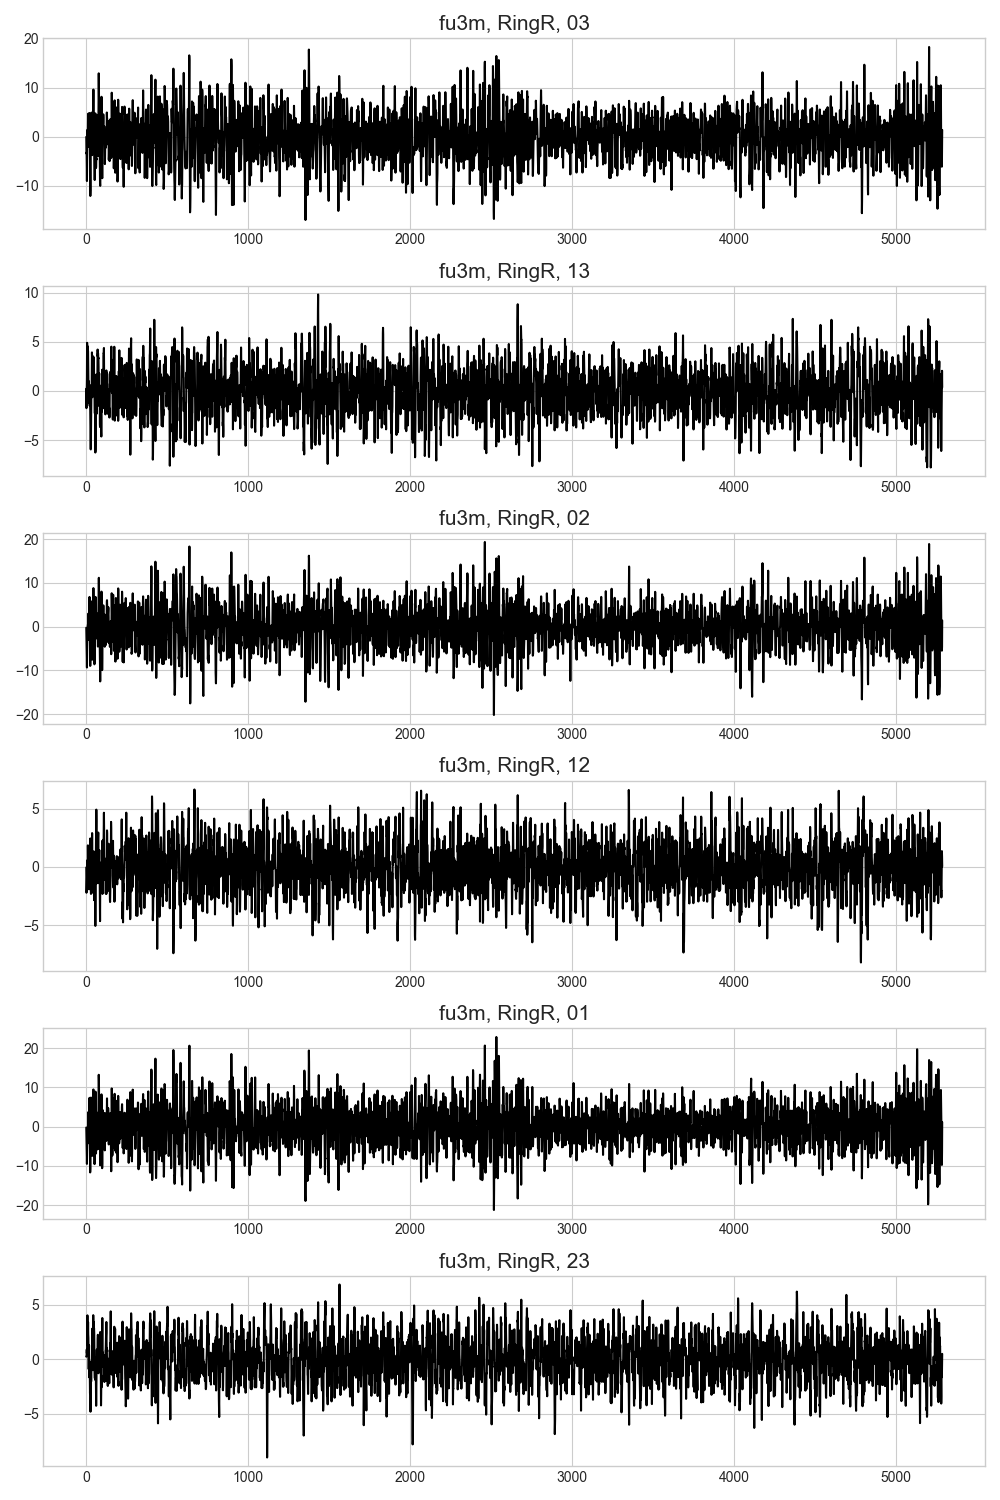

In [18]:
time_series = move_artifacts.plot_raw_time_series(
    incl_sub=["024", "025"],
    incl_session=["fu3m", "fu12m"],
    incl_condition=["m0s0"],
    filter="band-pass"
)

In [8]:
time_series["time_series"]

NameError: name 'time_series' is not defined

In [44]:
first = [x_list[0] for x_list in time_series["pos"]]
second = [y_list[1] for y_list in time_series["pos"]]

df = pd.DataFrame({"x": first, "y": second})
df

,x,y
0,2376.071567,0.034472
1,3028.930793,-0.082913
2,424.321665,1.138427
3,711.447213,0.823755
4,777.692083,-0.680105
5,1220.435696,-0.143489


## Plot Time Frequency Plots of all subject hemispheres

In [7]:
plot_time_frequency = TF.time_frequency(
    incl_sub=["017"],
    incl_session=["postop", "fu3m", "fu12m", "fu18m"],
    incl_condition=["m0s0"],
    filter_signal="band-pass"
)


	### WARNING: NaNs in Metadata Table sub-017 ###
NaNs in: sub-017_ses-2021040709594199_run-CHRONIC20210404124649.mat
NaNs in: sub-017_ses-2021040809491499_run-CHRONIC20210407065701.mat
NaNs in: sub-017_ses-2021041212054199_run-CHRONIC20210408063010.mat
NaNs in: sub-017_ses-2021041410364999_run-CHRONIC20210412103008.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414104500.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414104900.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105100.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105600.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414105900.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110100.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110400.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110700.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414110800.mat
NaNs in: sub-017_ses-2021041410364999_run-IS20210414111200.mat
NaNs in: sub-017_ses-2021041410364999_run-IS2021